# Importing all the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,f1_score,confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter

In [2]:
# Reading and extracting train.csv and test.csv files usind pandas. .csv files are now pandas dataframes

train = pd.read_csv("C:/Users/Vikitha Reddy/Downloads/train_PDjVQMB (1).csv")
test =pd.read_csv("C:/Users/Vikitha Reddy/Downloads/test_lTY72QC (1).csv")

In [3]:
# printing the top 5 rows

train.head()

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,84e2fcc9,36,Female,5L - 10L,563266.44,4,0,1,0,Average,1
1,57fea15e,53,Female,Less than 5L,875572.11,2,1,1,1,Poor,0
2,8df34ef3,35,Female,More than 15L,701607.06,2,1,2,0,Poor,0
3,c5c0788b,43,Female,More than 15L,1393922.16,0,1,2,1,Poor,1
4,951d69c4,39,Female,More than 15L,893146.23,1,1,1,1,Good,1


# Exploratory Data Analysis and Visualization

In [4]:
# value_counts gives the count of all resprctive values of 'Vintage' feature

train['Vintage'].value_counts().sort_index()

0     956
1    1354
2    1328
3    1405
4    1296
5     311
Name: Vintage, dtype: int64

<AxesSubplot:xlabel='Vintage', ylabel='Is_Churn'>

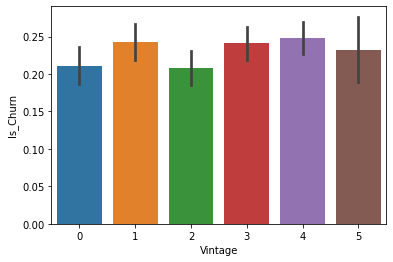

In [5]:
# barplot gives visualization of all values of Vintage feature againg target

sns.barplot(x='Vintage',y='Is_Churn',data=train)

<AxesSubplot:xlabel='Credit_Category', ylabel='Is_Churn'>

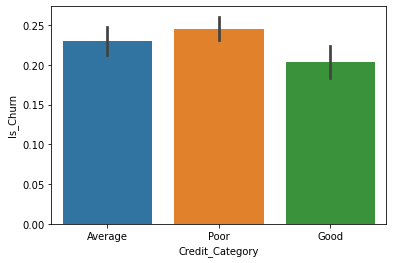

In [6]:
# Credit_Category vs Is_churn(target)

sns.barplot(x='Credit_Category',y='Is_Churn',data=train)

<AxesSubplot:xlabel='Is_Churn', ylabel='Credit_Card'>

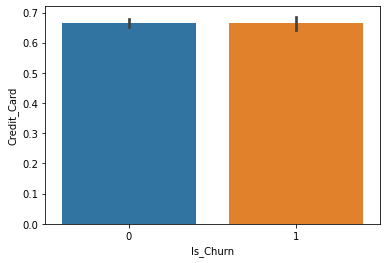

In [7]:
sns.barplot(x='Is_Churn',y='Credit_Card',data=train)

<AxesSubplot:xlabel='Product_Holdings', ylabel='Is_Churn'>

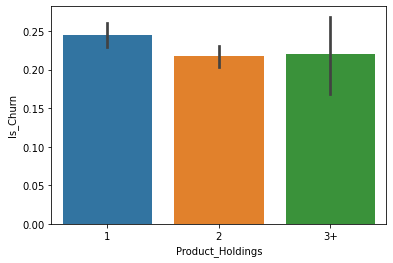

In [8]:
sns.barplot(x='Product_Holdings',y='Is_Churn',data=train)

<AxesSubplot:xlabel='Income', ylabel='Is_Churn'>

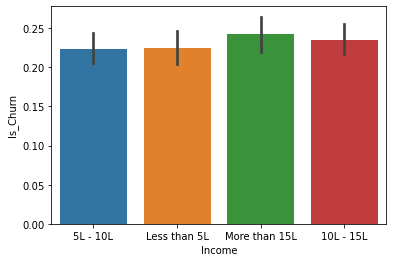

In [9]:
sns.barplot(x='Income',y='Is_Churn',data=train)

<AxesSubplot:xlabel='Gender', ylabel='Is_Churn'>

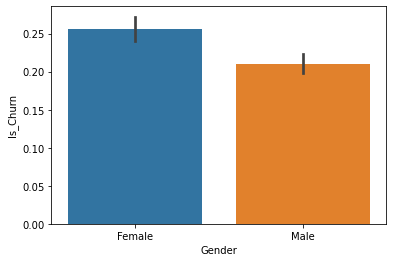

In [10]:
# Let's see the percentage of Male and Female having target 0/1

sns.barplot(x='Gender',y='Is_Churn',data=train)

In [11]:
# Gives the count of total number of rows and columns
train.shape

(6650, 11)

In [12]:
# Let's drop the ID column as the prediction never depend upon ID

train.drop(['ID'],axis=1,inplace=True)

In [13]:
# Gives the 5 number summary of the train dataset. It helps to find out if we're having any missing values. 
# If the difference between mean and median is statistically high, we can say there are outliers in the dataset.

train.describe()

,Age,Balance,Vintage,Transaction_Status,Credit_Card,Is_Churn
count,6650.000000,6.650000e+03,6650.000000,6650.000000,6650.000000,6650.000000
mean,41.130226,8.045954e+05,2.250226,0.515789,0.664361,0.231128
std,9.685747,5.157549e+05,1.458795,0.499788,0.472249,0.421586
min,21.000000,6.300000e+01,0.000000,0.000000,0.000000,0.000000
25%,34.000000,3.922642e+05,1.000000,0.000000,0.000000,0.000000
50%,40.000000,7.649386e+05,2.000000,1.000000,1.000000,0.000000
75%,47.000000,1.147124e+06,3.000000,1.000000,1.000000,0.000000
max,72.000000,2.436616e+06,5.000000,1.000000,1.000000,1.000000


In [14]:
# checks if there are any null values
train.isnull().sum()

Age                   0
Gender                0
Income                0
Balance               0
Vintage               0
Transaction_Status    0
Product_Holdings      0
Credit_Card           0
Credit_Category       0
Is_Churn              0
dtype: int64

In [15]:
train.shape

(6650, 10)

In [16]:
train.nunique()

Age                     52
Gender                   2
Income                   4
Balance               6643
Vintage                  6
Transaction_Status       2
Product_Holdings         3
Credit_Card              2
Credit_Category          3
Is_Churn                 2
dtype: int64

# Univariate and Bivariate Analysis

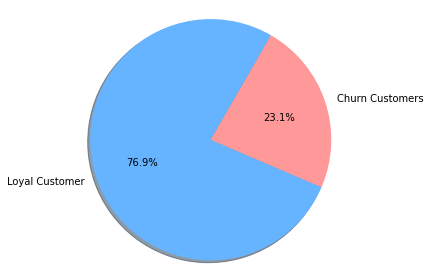

In [17]:
#No of exited vs Active  get the percentage split figure
ExitedValues = train.Is_Churn.value_counts()
labels = ["Loyal Customer","Churn Customers"]
colors = ['#66b3ff', '#ff9999']
fig1, f1 = plt.subplots()
f1.pie(ExitedValues,labels=labels, colors = colors, autopct='%1.1f%%',shadow=True, startangle=60) 
f1.axis('equal')
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='Vintage'>

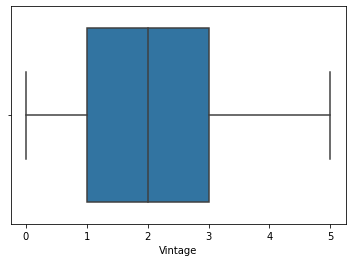

In [18]:
# CreditScore
sns.boxplot(train['Vintage'])

(array([1151.,  876., 1117., 1139.,  942.,  655.,  416.,  214.,   81.,
          59.]),
 array([6.30000000e+01, 2.43718281e+05, 4.87373562e+05, 7.31028843e+05,
        9.74684124e+05, 1.21833941e+06, 1.46199469e+06, 1.70564997e+06,
        1.94930525e+06, 2.19296053e+06, 2.43661581e+06]),
 <BarContainer object of 10 artists>)

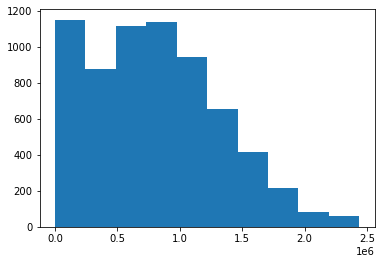

In [19]:
plt.hist(train['Balance'])

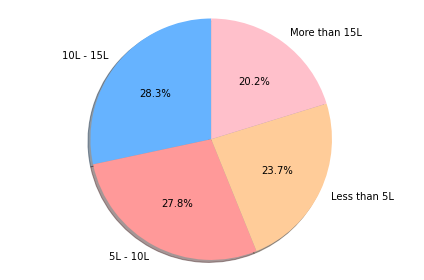

In [20]:
# this plot is to show how Income play a role at the customer churn stuff
income = train.Income.value_counts()
values  = train['Income'].value_counts().values.tolist()
labels  = train['Income'].value_counts().keys().tolist()
colors = ['#66b3ff', '#ff9999' , '#ffcc99','pink']
fig2, f2 = plt.subplots()
f2.pie(values,labels=labels, colors = colors, autopct='%1.1f%%',shadow=True, startangle=90) 
# Equal aspect ratio ensures that pie is drawn as a circle
f2.axis('equal')
plt.tight_layout()
plt.show()

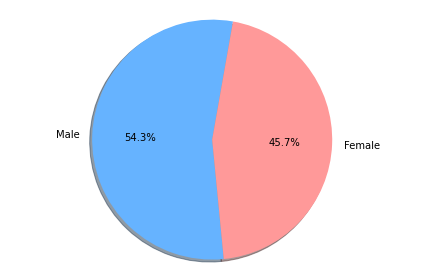

In [21]:
# this plot is to show how Gender play a role at the customer churn stuff
Gendervalues  = train['Gender'].value_counts().values.tolist()
GenderLabels = train['Gender'].value_counts().keys().tolist()
colors = ['#66b3ff', '#ff9999']
fig3, f3 = plt.subplots()
f3.pie(Gendervalues,labels=GenderLabels, colors = colors, autopct='%1.1f%%',shadow=True, startangle= 80) 
# Equal aspect ratio ensures that pie is drawn as a circle
f3.axis('equal')
plt.tight_layout()
plt.show()

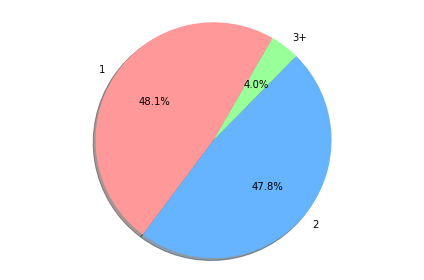

In [22]:
 # this plot is to show how Product_Holdings split 
Product_Holdings_values  = train['Product_Holdings'].value_counts().values.tolist()
Product_Holdings_labels  = train['Product_Holdings'].value_counts().keys().tolist()
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
fig4, f4 = plt.subplots()
f4.pie(Product_Holdings_values ,labels=Product_Holdings_labels, colors = colors,autopct='%1.1f%%',shadow=True, startangle=60) 
f4.axis('equal')
plt.tight_layout()
plt.show()

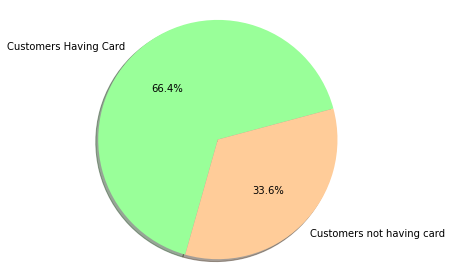

In [23]:
# this plot is to show how Credit_Card play a role at the customer churn 

HasCardvalues  = train['Credit_Card'].value_counts().values.tolist()
HasCardlabels  = ["Customers Having Card" , "Customers not having card"]
colors = ['#99ff99','#ffcc99']
fig5, f5 = plt.subplots()
f5.pie(HasCardvalues ,labels=HasCardlabels, colors = colors,autopct='%1.1f%%',shadow=True, startangle=15) 
f5.axis('equal')
plt.tight_layout()
plt.show()


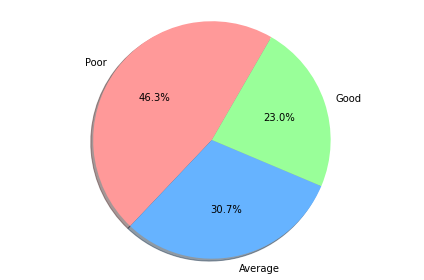

In [24]:
 # this plot is to show how Credit_Category split 
Cr_cat_values  = train['Credit_Category'].value_counts().values.tolist()
Cr_cat_labels  = train['Credit_Category'].value_counts().keys().tolist()
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
fig4, f4 = plt.subplots()
f4.pie(Cr_cat_values ,labels=Cr_cat_labels, colors = colors,autopct='%1.1f%%',shadow=True, startangle=60) 
f4.axis('equal')
plt.tight_layout()
plt.show()

# Outlier Treatment (Feature Engineering)

<AxesSubplot:xlabel='Age'>

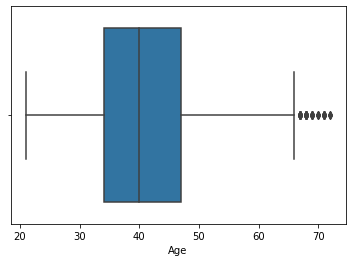

In [25]:
# lets have the flot for customers based on their age 
sns.boxplot(train['Age'] , orient = "v")

In [26]:
# Here we can see there are outliers in the Age column. So let's do outlier treatment

In [27]:
# Handling age column outliers
train['Age'] = np.where(train['Age']>65, 65,
                 np.where(train['Age']<20, 20, train['Age']))

<AxesSubplot:xlabel='Age'>

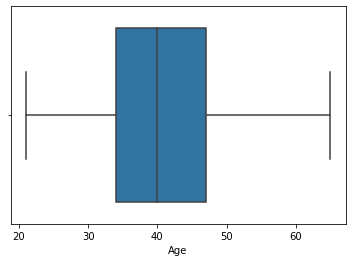

In [28]:
# Outliers are removed from Age column

sns.boxplot(train['Age'] , orient = "v")

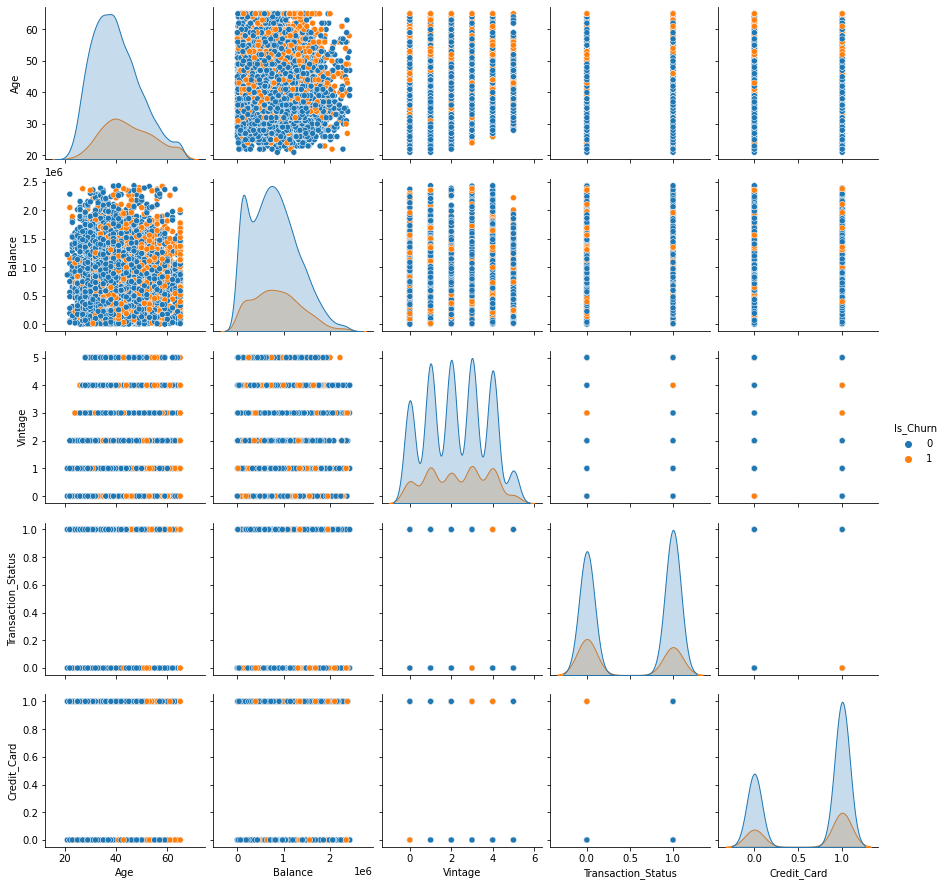

In [29]:
sns.pairplot(train, hue = 'Is_Churn')
#please explain this, else remove

In [30]:
# let's see the correlation matrix of the data
# Gives insight about multicollinearity. If correlation > 0.75, those features are higly correlated.

train[train.columns].corr()

,Age,Balance,Vintage,Transaction_Status,Credit_Card,Is_Churn
Age,1.000000,0.001898,0.017697,0.031537,0.011874,0.204016
Balance,0.001898,1.000000,-0.019385,-0.005088,-0.025259,0.056380
Vintage,0.017697,-0.019385,1.000000,-0.027286,0.001856,0.020152
Transaction_Status,0.031537,-0.005088,-0.027286,1.000000,0.006526,-0.086917
Credit_Card,0.011874,-0.025259,0.001856,0.006526,1.000000,-0.000848
Is_Churn,0.204016,0.056380,0.020152,-0.086917,-0.000848,1.000000


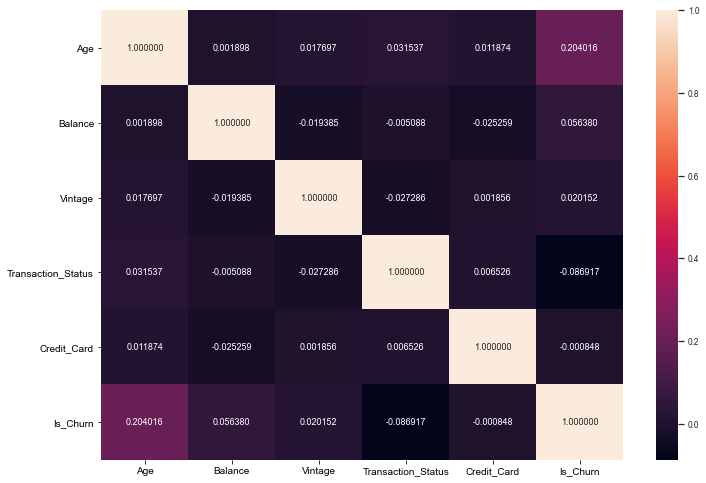

In [31]:
# generate the heatmap with te above data so that we can see what colums are corelated with the other one 
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.set(font_scale = 0.75)
sns.heatmap(train[train.columns].corr(), annot = True, fmt = ".6f")
plt.show()

In [32]:
# Checking if the dataset is balanced or imbalanced. We can clearly say it's an imbalanced dataset.

In [33]:
train['Is_Churn'].value_counts()

0    5113
1    1537
Name: Is_Churn, dtype: int64

In [34]:
train_1 = pd.get_dummies(train,drop_first=True)

In [35]:
train_1

,Age,Balance,Vintage,Transaction_Status,Credit_Card,Is_Churn,Gender_Male,Income_5L - 10L,Income_Less than 5L,Income_More than 15L,Product_Holdings_2,Product_Holdings_3+,Credit_Category_Good,Credit_Category_Poor
0,36,563266.44,4,0,0,1,0,1,0,0,0,0,0,0
1,53,875572.11,2,1,1,0,0,0,1,0,0,0,0,1
2,35,701607.06,2,1,0,0,0,0,0,1,1,0,0,1
3,43,1393922.16,0,1,1,1,0,0,0,1,1,0,0,1
4,39,893146.23,1,1,1,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6645,61,1354526.19,4,1,1,1,1,1,0,0,1,0,0,1
6646,42,596286.54,3,1,1,0,0,1,0,0,1,0,0,0
6647,29,979298.19,2,0,0,0,1,0,1,0,1,0,0,1
6648,65,395233.65,3,0,1,1,0,0,0,0,1,0,0,1


In [36]:
train_1.dtypes

Age                       int64
Balance                 float64
Vintage                   int64
Transaction_Status        int64
Credit_Card               int64
Is_Churn                  int64
Gender_Male               uint8
Income_5L - 10L           uint8
Income_Less than 5L       uint8
Income_More than 15L      uint8
Product_Holdings_2        uint8
Product_Holdings_3+       uint8
Credit_Category_Good      uint8
Credit_Category_Poor      uint8
dtype: object

In [37]:
y_1 = train_1.loc[:,'Is_Churn']
X_1 = train_1.drop('Is_Churn',axis=1)

In [38]:
Xtrain_1, Xtest_1, ytrain_1, ytest_1 = train_test_split(X_1,y_1,test_size=0.2, random_state=1)

In [39]:
Xtrain_1['Vintage'].describe()

count    5320.000000
mean        2.263722
std         1.460838
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         5.000000
Name: Vintage, dtype: float64

In [40]:
Xtrain_1['Vintage'].describe()

count    5320.000000
mean        2.263722
std         1.460838
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         5.000000
Name: Vintage, dtype: float64

In [41]:
X_1['Vintage'].describe()

count    6650.000000
mean        2.250226
std         1.458795
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         5.000000
Name: Vintage, dtype: float64

In [43]:
# Standard scalar converts the all the values into same range where mean=0 and standard deviation =1-- Z-score

scalar=StandardScaler()
scaled_train_1 = scalar.fit_transform(Xtrain_1)
scaled_test_1 = scalar.transform(Xtest_1)

# Model Building without using sampling techniques

In [44]:
# Logistic regression

lr_1=LogisticRegression()
lr_1.fit(scaled_train_1, ytrain_1)
ypredicted_1 = lr_1.predict(scaled_test_1)
print(accuracy_score(ytest_1,ypredicted_1))
print(f1_score(ytest_1,ypredicted_1))
print(confusion_matrix(ytest_1,ypredicted_1))
print(classification_report(ytest_1,ypredicted_1))

0.7736842105263158
0.06230529595015576
[[1019   11]
 [ 290   10]]
              precision    recall  f1-score   support

           0       0.78      0.99      0.87      1030
           1       0.48      0.03      0.06       300

    accuracy                           0.77      1330
   macro avg       0.63      0.51      0.47      1330
weighted avg       0.71      0.77      0.69      1330



In [45]:
# Fit logistic regression with degree 2 polynomial kernel
# Hyper parameter tuning 

param_grid_1 = {'C': [0.1,10,50], 'max_iter': [300,500], 'fit_intercept':[True],'intercept_scaling':[1],'penalty':['l2'],
              'tol':[0.0001,0.000001]}
grid_log_1 = GridSearchCV(lr_1,param_grid_1, cv=5, refit=True)
grid_log_1.fit(scaled_train_1, ytrain_1)

ypredicted_1_grid = grid_log_1.predict(scaled_test_1)
print(accuracy_score(ytest_1,ypredicted_1_grid))
print(f1_score(ytest_1,ypredicted_1_grid))
print(confusion_matrix(ytest_1,ypredicted_1_grid))
print(classification_report(ytest_1,ypredicted_1_grid))

0.7736842105263158
0.06230529595015576
[[1019   11]
 [ 290   10]]
              precision    recall  f1-score   support

           0       0.78      0.99      0.87      1030
           1       0.48      0.03      0.06       300

    accuracy                           0.77      1330
   macro avg       0.63      0.51      0.47      1330
weighted avg       0.71      0.77      0.69      1330



In [46]:
# DecisionTreeClassifier

dtree_1 = DecisionTreeClassifier(max_depth=10, min_samples_split=2, min_samples_leaf=3).fit(Xtrain_1,ytrain_1)

ypredicted_tree_1 = dtree_1.predict(Xtest_1)
print(accuracy_score(ytest_1,ypredicted_tree_1))
print(f1_score(ytest_1,ypredicted_tree_1,average='macro'))
print(confusion_matrix(ytest_1,ypredicted_tree_1))
print(classification_report(ytest_1,ypredicted_tree_1))

0.718796992481203
0.5101607521989687
[[912 118]
 [256  44]]
              precision    recall  f1-score   support

           0       0.78      0.89      0.83      1030
           1       0.27      0.15      0.19       300

    accuracy                           0.72      1330
   macro avg       0.53      0.52      0.51      1330
weighted avg       0.67      0.72      0.69      1330



In [47]:
# Gridsearch for decisiontreeClassifier
# Hyper Parameter tuning for DecisionTreeClassifier

param_grid_1 = {'max_features':['auto','sqrt'],
            'max_depth':[int(x) for x in np.linspace(start=4,stop=50,num=11)],
            'min_samples_leaf':[10,12,15,19,22,15,40,45],
            'min_samples_split':[10,15,20,25,30,35,40,45]}
grid_dtree_1 = GridSearchCV(dtree_1,param_grid_1,cv=10,n_jobs=-1)
grid_dtree_1.fit(Xtrain_1,ytrain_1)

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(max_depth=10, min_samples_leaf=3),
             n_jobs=-1,
             param_grid={'max_depth': [4, 8, 13, 17, 22, 27, 31, 36, 40, 45,
                                       50],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [10, 12, 15, 19, 22, 15, 40, 45],
                         'min_samples_split': [10, 15, 20, 25, 30, 35, 40, 45]})

In [48]:
grid_dtree_1.best_estimator_, grid_dtree_1.best_score_, grid_dtree_1.best_params_

(DecisionTreeClassifier(max_depth=4, max_features='auto', min_samples_leaf=15,
                        min_samples_split=25),
 0.7699248120300752,
 {'max_depth': 4,
  'max_features': 'auto',
  'min_samples_leaf': 15,
  'min_samples_split': 25})

In [49]:
# Precition on test data

ypredicted_grid_dtree_1 = grid_dtree_1.predict(Xtest_1)

print(accuracy_score(ytest_1,ypredicted_grid_dtree_1))
print(f1_score(ytest_1,ypredicted_grid_dtree_1,average='macro'))
print(confusion_matrix(ytest_1,ypredicted_grid_dtree_1))
print(classification_report(ytest_1,ypredicted_grid_dtree_1))

0.7744360902255639
0.4364406779661017
[[1030    0]
 [ 300    0]]
              precision    recall  f1-score   support

           0       0.77      1.00      0.87      1030
           1       0.00      0.00      0.00       300

    accuracy                           0.77      1330
   macro avg       0.39      0.50      0.44      1330
weighted avg       0.60      0.77      0.68      1330



In [50]:
# Random forest

rf_1 = RandomForestClassifier(max_depth=4, max_features='auto', min_samples_leaf=15,
                        min_samples_split=25,n_estimators=199)
# param_grid={
#             'max_depth':[int(x) for x in np.linspace(start=10,stop=100,num=11)],
#             'min_samples_leaf':[1,2,3,5],
#             'min_samples_split':[2,5,10,15]}
# rf_1 = GridSearchCV(rf,param_grid,cv=10,n_jobs=-1)
rf_1.fit(Xtrain_1,ytrain_1)

ypredicted_rf_1 = rf_1.predict(Xtest_1)

print(accuracy_score(ytest_1,ypredicted_rf_1))
print(f1_score(ytest_1,ypredicted_rf_1,average='macro'))
print(confusion_matrix(ytest_1,ypredicted_rf_1))
print(classification_report(ytest_1,ypredicted_rf_1))

0.7744360902255639
0.4364406779661017
[[1030    0]
 [ 300    0]]
              precision    recall  f1-score   support

           0       0.77      1.00      0.87      1030
           1       0.00      0.00      0.00       300

    accuracy                           0.77      1330
   macro avg       0.39      0.50      0.44      1330
weighted avg       0.60      0.77      0.68      1330



# Boosting

In [51]:
# boosting technique- Light gradient boosting mechanism

import lightgbm as lgb
model_lgb_1 = lgb.LGBMClassifier(learning_rate=0.09,max_depth=46,random_state=42)
model_lgb_1.fit(Xtrain_1,ytrain_1,eval_set=[(Xtest_1,ytest_1),(Xtrain_1,ytrain_1)],
          verbose=20,eval_metric='logloss')

[20]	training's binary_logloss: 0.476927	valid_0's binary_logloss: 0.520295
[40]	training's binary_logloss: 0.446497	valid_0's binary_logloss: 0.525361
[60]	training's binary_logloss: 0.423617	valid_0's binary_logloss: 0.527388
[80]	training's binary_logloss: 0.403688	valid_0's binary_logloss: 0.528992
[100]	training's binary_logloss: 0.387143	valid_0's binary_logloss: 0.532655


LGBMClassifier(learning_rate=0.09, max_depth=46, random_state=42)

In [52]:
y_pred_model_lgb_1 = model_lgb_1.predict(Xtest_1)
print(confusion_matrix(ytest_1,y_pred_model_lgb_1))
print(accuracy_score(ytest_1,y_pred_model_lgb_1))
print("F1-Score",f1_score(ytest_1,y_pred_model_lgb_1,average='macro'))
print(classification_report(ytest_1,y_pred_model_lgb_1))

[[994  36]
 [282  18]]
0.7609022556390977
F1-Score 0.481896893880371
              precision    recall  f1-score   support

           0       0.78      0.97      0.86      1030
           1       0.33      0.06      0.10       300

    accuracy                           0.76      1330
   macro avg       0.56      0.51      0.48      1330
weighted avg       0.68      0.76      0.69      1330



In [ ]:
# As the dataset is imbalances let's oversample the data as traing with the imbalanced data is not giving good accuracy/ F1-Score

In [ ]:
# Let's try using Oversampling

# Oversampling

In [53]:
train_majority = train[train.Is_Churn==0]
train_minority = train[train.Is_Churn==1]
train_minority_upsampled = resample(train_minority, replace=True,     # sample with replacement
                                 n_samples=5113,    # to match majority class
                                 random_state=123) # reproducible results
train_upsampled = pd.concat([train_majority, train_minority_upsampled])

In [54]:
train_upsampled.Is_Churn.value_counts()

0    5113
1    5113
Name: Is_Churn, dtype: int64

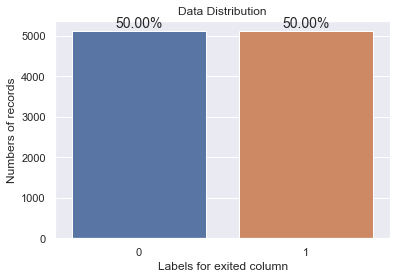

In [55]:
# Graphical representation of the target label percentage.
total_len = len(train_upsampled['Is_Churn'])
sns.set()
sns.countplot(train_upsampled.Is_Churn).set_title('Data Distribution')
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 2,
            '{:.2f}%'.format(100 * (height/total_len)),
            fontsize=14, ha='center', va='bottom')
sns.set(font_scale=1.5)
ax.set_xlabel("Labels for exited column")
ax.set_ylabel("Numbers of records")
plt.show()

In [56]:
# apply baseline models 
# As the problem is of classification, we will apply logistic classification, decision trees and random forest to the problem to check the accuracy and F1-scoe

In [57]:
train_new = train_upsampled

In [58]:
train_new.dtypes

Age                     int64
Gender                 object
Income                 object
Balance               float64
Vintage                 int64
Transaction_Status      int64
Product_Holdings       object
Credit_Card             int64
Credit_Category        object
Is_Churn                int64
dtype: object

In [59]:
train_new.Credit_Category.value_counts()

Poor       4832
Average    3132
Good       2262
Name: Credit_Category, dtype: int64

In [60]:
train_new.Income.value_counts()

10L - 15L        2915
5L - 10L         2746
Less than 5L     2415
More than 15L    2150
Name: Income, dtype: int64

In [61]:
# Converting all categorical features into numerical
train_new = pd.get_dummies(train_new,drop_first=True)

In [62]:
# We can see all dtypes are numerical
train_new.dtypes

Age                       int64
Balance                 float64
Vintage                   int64
Transaction_Status        int64
Credit_Card               int64
Is_Churn                  int64
Gender_Male               uint8
Income_5L - 10L           uint8
Income_Less than 5L       uint8
Income_More than 15L      uint8
Product_Holdings_2        uint8
Product_Holdings_3+       uint8
Credit_Category_Good      uint8
Credit_Category_Poor      uint8
dtype: object

In [63]:
train_new.shape

(10226, 14)

In [64]:
train_new.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.9,0.99])

,Age,Balance,Vintage,Transaction_Status,Credit_Card,Is_Churn,Gender_Male,Income_5L - 10L,Income_Less than 5L,Income_More than 15L,Product_Holdings_2,Product_Holdings_3+,Credit_Category_Good,Credit_Category_Poor
count,10226.000000,1.022600e+04,10226.000000,10226.000000,10226.000000,10226.000000,10226.000000,10226.000000,10226.000000,10226.000000,10226.000000,10226.000000,10226.000000,10226.000000
mean,42.294837,8.269920e+05,2.262859,0.485820,0.668394,0.500000,0.523078,0.268531,0.236163,0.210248,0.469881,0.038529,0.221201,0.472521
std,9.737343,5.202900e+05,1.460061,0.499823,0.470813,0.500024,0.499492,0.443217,0.424744,0.407505,0.499116,0.192480,0.415076,0.499269
min,21.000000,6.300000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1%,25.000000,1.559475e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5%,28.000000,6.945300e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10%,30.000000,1.376550e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,4.203579e+05,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,41.000000,7.921282e+05,2.000000,0.000000,1.000000,0.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,49.000000,1.172897e+06,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000


<AxesSubplot:xlabel='Age'>

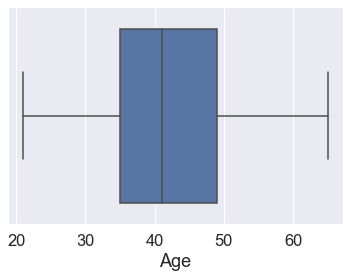

In [65]:
sns.boxplot(train_new['Age'])

In [66]:
# seperating dependent and independent variables

y = train_new.loc[:,'Is_Churn']
X = train_new.drop('Is_Churn',axis=1)

In [67]:
# Splitting the data into train and test

Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.2, random_state=1)

In [68]:
# Standard scalar converts the all the values into same range where mean=0 and standard deviation =1-- Z-score

scalar=StandardScaler()
scaled_train = scalar.fit_transform(Xtrain)
scaled_test = scalar.transform(Xtest)

In [69]:
scaled_train

array([[-0.95845387,  0.44100509, -0.18812726, ..., -0.19913386,
         1.86869937, -0.94874451],
       [ 2.3267557 ,  0.60166148, -0.18812726, ..., -0.19913386,
         1.86869937, -0.94874451],
       [-0.54780267,  1.73687626,  0.50041011, ..., -0.19913386,
         1.86869937, -0.94874451],
       ...,
       [-1.36910506, -0.18710276, -0.18812726, ..., -0.19913386,
        -0.53513155,  1.05402455],
       [-0.44513987, -0.16044368, -0.87666463, ..., -0.19913386,
        -0.53513155, -0.94874451],
       [-0.23981427,  0.44896874,  0.50041011, ..., -0.19913386,
        -0.53513155,  1.05402455]])

In [70]:
scaled_test

array([[ 2.3267557 , -0.36936572,  0.50041011, ..., -0.19913386,
        -0.53513155, -0.94874451],
       [ 1.09480211,  0.89737346, -0.87666463, ..., -0.19913386,
        -0.53513155, -0.94874451],
       [ 1.71077891,  1.34060552, -0.18812726, ..., -0.19913386,
        -0.53513155,  1.05402455],
       ...,
       [-0.34247707, -0.08062905,  1.18894748, ..., -0.19913386,
        -0.53513155,  1.05402455],
       [-0.44513987,  2.12862677, -0.18812726, ..., -0.19913386,
        -0.53513155, -0.94874451],
       [ 0.58148812, -0.23681663, -1.565202  , ..., -0.19913386,
        -0.53513155,  1.05402455]])

# Model Building

In [71]:
# Let's start with basic one
lr=LogisticRegression()
lr.fit(scaled_train, ytrain)
ypredicted=lr.predict(scaled_test)
print(accuracy_score(ytest,ypredicted))
print(f1_score(ytest,ypredicted))
print(confusion_matrix(ytest,ypredicted))
print(classification_report(ytest,ypredicted))

0.6373411534701857
0.6304780876494023
[[671 384]
 [358 633]]
              precision    recall  f1-score   support

           0       0.65      0.64      0.64      1055
           1       0.62      0.64      0.63       991

    accuracy                           0.64      2046
   macro avg       0.64      0.64      0.64      2046
weighted avg       0.64      0.64      0.64      2046



In [72]:
# Fit logistic regression with degree 2 polynomial kernel
# Hyper parameter tuning

param_grid = {'C': [0.1,10,50], 'max_iter': [300,500], 'fit_intercept':[True],'intercept_scaling':[1],'penalty':['l2'],
              'tol':[0.0001,0.000001]}
grid_log = GridSearchCV(LogisticRegression(solver = 'liblinear'),param_grid, cv=5, refit=True)
grid_log.fit(Xtrain,ytrain)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [0.1, 10, 50], 'fit_intercept': [True],
                         'intercept_scaling': [1], 'max_iter': [300, 500],
                         'penalty': ['l2'], 'tol': [0.0001, 1e-06]})

In [73]:
# Predictions

ypredicted_log = grid_log.predict(Xtest)
print(accuracy_score(ytest,ypredicted_log))
print(f1_score(ytest,ypredicted_log,average='macro'))
print(confusion_matrix(ytest,ypredicted_log))
print(classification_report(ytest,ypredicted_log))

0.6348973607038123
0.6347779208635552
[[668 387]
 [360 631]]
              precision    recall  f1-score   support

           0       0.65      0.63      0.64      1055
           1       0.62      0.64      0.63       991

    accuracy                           0.63      2046
   macro avg       0.63      0.63      0.63      2046
weighted avg       0.64      0.63      0.63      2046



In [74]:
# Fit logistic regression with degree 2 polynomial kernel.
# Testing againt scaled data

param_grid = {'C': [0.1,10,50], 'max_iter': [300,500], 'fit_intercept':[True],'intercept_scaling':[1],'penalty':['l2'],
              'tol':[0.0001,0.000001]}
grid_log_scaled = GridSearchCV(LogisticRegression(solver = 'liblinear'),param_grid, cv=5, refit=True)
grid_log_scaled.fit(scaled_train,ytrain)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [0.1, 10, 50], 'fit_intercept': [True],
                         'intercept_scaling': [1], 'max_iter': [300, 500],
                         'penalty': ['l2'], 'tol': [0.0001, 1e-06]})

In [75]:
ypredicted_log_scaled = grid_log_scaled.predict(scaled_test)
print(accuracy_score(ytest,ypredicted_log_scaled))
print(f1_score(ytest,ypredicted_log_scaled,average='macro'))
print(confusion_matrix(ytest,ypredicted_log_scaled))
print(classification_report(ytest,ypredicted_log_scaled))

0.6388074291300098
0.6387017009523067
[[671 384]
 [355 636]]
              precision    recall  f1-score   support

           0       0.65      0.64      0.64      1055
           1       0.62      0.64      0.63       991

    accuracy                           0.64      2046
   macro avg       0.64      0.64      0.64      2046
weighted avg       0.64      0.64      0.64      2046



In [76]:
# Decision Tree classifier. 
# Scaling is not reqiured

dtree=DecisionTreeClassifier(max_depth=10, min_samples_split=2, min_samples_leaf=3).fit(Xtrain,ytrain)
ypredicted_tree = dtree.predict(Xtest)

print(accuracy_score(ytest,ypredicted_tree))
print(f1_score(ytest,ypredicted_tree,average='macro'))
print(confusion_matrix(ytest,ypredicted_tree))
print(classification_report(ytest,ypredicted_tree))

0.6886608015640274
0.6884964221241056
[[681 374]
 [263 728]]
              precision    recall  f1-score   support

           0       0.72      0.65      0.68      1055
           1       0.66      0.73      0.70       991

    accuracy                           0.69      2046
   macro avg       0.69      0.69      0.69      2046
weighted avg       0.69      0.69      0.69      2046



In [77]:
# Gridsearch for decisiontreeClassifier
# Hyperparameter tunding for Decision tree

param_grid={'max_features':['auto','sqrt'],
            'max_depth':[int(x) for x in np.linspace(start=10,stop=100,num=11)],
            'min_samples_leaf':[1,2,3,5],
            'min_samples_split':[2,5,10,15]}
grid_dtree = GridSearchCV(dtree,param_grid,cv=10,n_jobs=-1)
grid_dtree.fit(Xtrain,ytrain)

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(max_depth=10, min_samples_leaf=3),
             n_jobs=-1,
             param_grid={'max_depth': [10, 19, 28, 37, 46, 55, 64, 73, 82, 91,
                                       100],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 3, 5],
                         'min_samples_split': [2, 5, 10, 15]})

In [78]:
grid_dtree.best_score_, grid_dtree.best_estimator_, grid_dtree.best_score_, grid_dtree.best_params_

(0.8431540342298287,
 DecisionTreeClassifier(max_depth=46, max_features='auto'),
 0.8431540342298287,
 {'max_depth': 46,
  'max_features': 'auto',
  'min_samples_leaf': 1,
  'min_samples_split': 2})

In [79]:
# predictions and accuracy

ypredicted_grid_dtree = grid_dtree.predict(Xtest)

print(accuracy_score(ytest,ypredicted_grid_dtree))
print(f1_score(ytest,ypredicted_grid_dtree,average='macro'))
print(confusion_matrix(ytest,ypredicted_grid_dtree))
print(classification_report(ytest,ypredicted_grid_dtree))

0.8528836754643206
0.8519898049309814
[[793 262]
 [ 39 952]]
              precision    recall  f1-score   support

           0       0.95      0.75      0.84      1055
           1       0.78      0.96      0.86       991

    accuracy                           0.85      2046
   macro avg       0.87      0.86      0.85      2046
weighted avg       0.87      0.85      0.85      2046



In [80]:
rf = RandomForestClassifier(max_depth=46, min_samples_split=2, min_samples_leaf=1,max_features='auto',n_estimators=101)
# param_grid={'n_estimators':[int(x) for x in np.linspace(start=200,stop=1200,num=11)],
#             'max_features':['auto','sqrt'],
#             'max_depth':[int(x) for x in np.linspace(start=10,stop=100,num=11)],
#             'min_samples_leaf':[1,2,3,5],
#             'min_samples_split':[2,5,10,15]}
# rf = GridSearchCV(rf,param_grid,cv=10,n_jobs=-1)
rf.fit(Xtrain,ytrain)

ypredicted_rf = rf.predict(Xtest)

print(accuracy_score(ytest,ypredicted_rf))
print(f1_score(ytest,ypredicted_rf,average='macro'))
print(confusion_matrix(ytest,ypredicted_rf))
print(classification_report(ytest,ypredicted_rf))

0.9125122189638318
0.9124969805659549
[[920 135]
 [ 44 947]]
              precision    recall  f1-score   support

           0       0.95      0.87      0.91      1055
           1       0.88      0.96      0.91       991

    accuracy                           0.91      2046
   macro avg       0.91      0.91      0.91      2046
weighted avg       0.92      0.91      0.91      2046



In [85]:
from xgboost import XGBClassifier
xgb = XGBClassifier(max_depth=46, min_samples_split=2, min_samples_leaf=1,max_features='auto',n_estimators=101,learning_rate=0.051,gamma=0.5)
xgb.fit(Xtrain, ytrain)

ypredicted_xgb = xgb.predict(Xtest)

print(accuracy_score(ytest,ypredicted_xgb))
print(f1_score(ytest,ypredicted_xgb,average='macro'))
print(confusion_matrix(ytest,ypredicted_xgb))
print(classification_report(ytest,ypredicted_xgb))

[00:56:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[00:56:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.8822091886608016
0.8819546904771767
[[855 200]
 [ 41 950]]
              precision    recall  f1-score   support

           0       0.95      0.81      0.88      1055
           1       0.83      0.96      0.89       991

   

In [86]:
import lightgbm as lgb
model = lgb.LGBMClassifier(learning_rate=0.09,max_depth=46,random_state=42)
model.fit(Xtrain,ytrain,eval_set=[(Xtest,ytest),(Xtrain,ytrain)],
          verbose=20,eval_metric='logloss')

[20]	training's binary_logloss: 0.605589	valid_0's binary_logloss: 0.620674
[40]	training's binary_logloss: 0.562389	valid_0's binary_logloss: 0.595111
[60]	training's binary_logloss: 0.530417	valid_0's binary_logloss: 0.576092
[80]	training's binary_logloss: 0.501382	valid_0's binary_logloss: 0.558087
[100]	training's binary_logloss: 0.473244	valid_0's binary_logloss: 0.542357


LGBMClassifier(learning_rate=0.09, max_depth=46, random_state=42)

In [87]:
y_pred_lgbm=model.predict(Xtest)
print(confusion_matrix(ytest,y_pred_lgbm))
print(accuracy_score(ytest,y_pred_lgbm))
print("F1-Score",f1_score(ytest,y_pred_lgbm,average='macro'))
print(classification_report(ytest,y_pred_lgbm))

[[749 306]
 [199 792]]
0.7531769305962854
F1-Score 0.7530678611092456
              precision    recall  f1-score   support

           0       0.79      0.71      0.75      1055
           1       0.72      0.80      0.76       991

    accuracy                           0.75      2046
   macro avg       0.76      0.75      0.75      2046
weighted avg       0.76      0.75      0.75      2046



In [88]:
import lightgbm as lgb
model_lgb = lgb.LGBMClassifier(learning_rate=0.09,max_depth=46,random_state=42)
model_lgb.fit(scaled_train,ytrain,eval_set=[(scaled_test,ytest),(scaled_train,ytrain)],
          verbose=20,eval_metric='logloss')

[20]	training's binary_logloss: 0.602019	valid_0's binary_logloss: 0.614605
[40]	training's binary_logloss: 0.561913	valid_0's binary_logloss: 0.589838
[60]	training's binary_logloss: 0.530082	valid_0's binary_logloss: 0.570816
[80]	training's binary_logloss: 0.500956	valid_0's binary_logloss: 0.552392
[100]	training's binary_logloss: 0.476368	valid_0's binary_logloss: 0.539105


LGBMClassifier(learning_rate=0.09, max_depth=46, random_state=42)

In [89]:
y_pred_lgbm_1=model_lgb.predict(scaled_test)
print(confusion_matrix(ytest,y_pred_lgbm_1))
print(accuracy_score(ytest,y_pred_lgbm_1))
print("F1-Score",f1_score(ytest,y_pred_lgbm_1,average='macro'))
print(classification_report(ytest,y_pred_lgbm_1))

[[770 285]
 [194 797]]
0.7658846529814272
F1-Score 0.765843875369231
              precision    recall  f1-score   support

           0       0.80      0.73      0.76      1055
           1       0.74      0.80      0.77       991

    accuracy                           0.77      2046
   macro avg       0.77      0.77      0.77      2046
weighted avg       0.77      0.77      0.77      2046



# SMOTE 

In [90]:
train['Is_Churn'].value_counts()

0    5113
1    1537
Name: Is_Churn, dtype: int64

In [91]:
sm = SMOTE()
Xtrain_sm, ytrain_sm = sm.fit_resample(Xtrain, ytrain)

In [92]:
ytrain_sm.value_counts()

0    4122
1    4122
Name: Is_Churn, dtype: int64

In [93]:
# Decision Tree classifier. 
# Scaling is not reqiured

dtree_sm = DecisionTreeClassifier(max_depth=10, min_samples_split=2, min_samples_leaf=3).fit(Xtrain,ytrain)
ypredicted_tree_sm = dtree_sm.predict(Xtest)

print(accuracy_score(ytest,ypredicted_tree_sm))
print(f1_score(ytest,ypredicted_tree_sm,average='macro'))
print(confusion_matrix(ytest,ypredicted_tree_sm))
print(classification_report(ytest,ypredicted_tree_sm))

0.6862170087976539
0.6860718229139282
[[680 375]
 [267 724]]
              precision    recall  f1-score   support

           0       0.72      0.64      0.68      1055
           1       0.66      0.73      0.69       991

    accuracy                           0.69      2046
   macro avg       0.69      0.69      0.69      2046
weighted avg       0.69      0.69      0.69      2046



In [94]:
# Gridsearch for decisiontreeClassifier
# Hyperparameter tunding for Decision tree

param_grid={'max_features':['auto','sqrt'],
            'max_depth':[int(x) for x in np.linspace(start=10,stop=150,num=11)],
            'min_samples_leaf':[1,2,3,5],
            'min_samples_split':[2,5,10,15]}
grid_dtree_sm = GridSearchCV(dtree_sm,param_grid,cv=10,n_jobs=-1)
grid_dtree_sm.fit(Xtrain_sm,ytrain_sm)

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(max_depth=10, min_samples_leaf=3),
             n_jobs=-1,
             param_grid={'max_depth': [10, 24, 38, 52, 66, 80, 94, 108, 122,
                                       136, 150],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 3, 5],
                         'min_samples_split': [2, 5, 10, 15]})

In [95]:
grid_dtree_sm.best_params_

{'max_depth': 38,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [96]:
# predictions and accuracy

ypredicted_grid_dtree_sm = grid_dtree_sm.predict(Xtest)

print(accuracy_score(ytest,ypredicted_grid_dtree_sm))
print(f1_score(ytest,ypredicted_grid_dtree_sm,average='macro'))
print(confusion_matrix(ytest,ypredicted_grid_dtree_sm))
print(classification_report(ytest,ypredicted_grid_dtree_sm))

0.8475073313782991
0.846592482081885
[[788 267]
 [ 45 946]]
              precision    recall  f1-score   support

           0       0.95      0.75      0.83      1055
           1       0.78      0.95      0.86       991

    accuracy                           0.85      2046
   macro avg       0.86      0.85      0.85      2046
weighted avg       0.87      0.85      0.85      2046



In [100]:
rf_sm = RandomForestClassifier(max_depth=38, min_samples_split=2, min_samples_leaf=1,max_features='auto',n_estimators=999)
# param_grid={'n_estimators':[int(x) for x in np.linspace(start=200,stop=1200,num=11)],
#             'max_features':['auto','sqrt'],
#             'max_depth':[int(x) for x in np.linspace(start=10,stop=100,num=11)],
#             'min_samples_leaf':[1,2,3,5],
#             'min_samples_split':[2,5,10,15]}
# rf = GridSearchCV(rf,param_grid,cv=10,n_jobs=-1)
rf_sm.fit(Xtrain_sm,ytrain_sm)

ypredicted_rf_sm = rf_sm.predict(Xtest)

print(accuracy_score(ytest,ypredicted_rf))
print(f1_score(ytest,ypredicted_rf_sm,average='macro'))
print(confusion_matrix(ytest,ypredicted_rf_sm))
print(classification_report(ytest,ypredicted_rf_sm))

0.9125122189638318
0.9134822750017618
[[925 130]
 [ 47 944]]
              precision    recall  f1-score   support

           0       0.95      0.88      0.91      1055
           1       0.88      0.95      0.91       991

    accuracy                           0.91      2046
   macro avg       0.92      0.91      0.91      2046
weighted avg       0.92      0.91      0.91      2046



In [106]:
from xgboost import XGBClassifier
xgb_sm = XGBClassifier(max_depth=38, min_samples_split=2, min_samples_leaf=1,max_features='auto',n_estimators=999,
                       learning_rate=0.5)
xgb_sm.fit(Xtrain_sm, ytrain_sm)

ypredicted_xgb_sm = xgb_sm.predict(Xtest)

print(accuracy_score(ytest,ypredicted_xgb_sm))
print(f1_score(ytest,ypredicted_xgb_sm,average='macro'))
print(confusion_matrix(ytest,ypredicted_xgb_sm))
print(classification_report(ytest,ypredicted_xgb_sm))

[01:02:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[01:02:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.8910068426197458
0.8908522513466504
[[873 182]
 [ 41 950]]
              precision    recall  f1-score   support

           0       0.96      0.83      0.89      1055
           1       0.84      0.96      0.89       991

   

In [103]:
import lightgbm as lgb
model_sm = lgb.LGBMClassifier(learning_rate=0.09,max_depth=46,random_state=42)
model_sm.fit(Xtrain_sm,ytrain_sm,eval_set=[(Xtest,ytest),(Xtrain_sm,ytrain_sm)],
          verbose=20,eval_metric='logloss')

[20]	training's binary_logloss: 0.603244	valid_0's binary_logloss: 0.616118
[40]	training's binary_logloss: 0.558198	valid_0's binary_logloss: 0.589783
[60]	training's binary_logloss: 0.52479	valid_0's binary_logloss: 0.569035
[80]	training's binary_logloss: 0.495112	valid_0's binary_logloss: 0.551815
[100]	training's binary_logloss: 0.468268	valid_0's binary_logloss: 0.537075


LGBMClassifier(learning_rate=0.09, max_depth=46, random_state=42)

In [104]:
y_pred_lgb_grid_sm = model_sm.predict(Xtest)
print(confusion_matrix(ytest,y_pred_lgb_grid_sm))
print(accuracy_score(ytest,y_pred_lgb_grid_sm))
print("F1-Score",f1_score(ytest,y_pred_lgb_grid_sm,average='macro'))
print(classification_report(ytest,y_pred_lgb_grid_sm))

[[765 290]
 [205 786]]
0.7580645161290323
F1-Score 0.7580390259635543
              precision    recall  f1-score   support

           0       0.79      0.73      0.76      1055
           1       0.73      0.79      0.76       991

    accuracy                           0.76      2046
   macro avg       0.76      0.76      0.76      2046
weighted avg       0.76      0.76      0.76      2046



# Conclusion
- We are getting statistically similar accuracy using oversampling or SMOTE. Hence we can consider any one of both. Here i'm considering the SMOTE one.
- We are getting best accuracy using Random forest and XGBoost.
- Finalising Random Forest as the final model as it is having 2% better accuracy.

# preprocessing and scaling and predicting againt test.csv

In [107]:
test_df = pd.read_csv("C:/Users/Vikitha Reddy/Downloads/test_lTY72QC.csv")

In [108]:
test_df.head()

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category
0,55480787,50,Female,More than 15L,1008636.39,2,1,2,1,Average
1,9aededf2,36,Male,5L - 10L,341460.72,2,0,2,1,Average
2,a5034a09,25,Female,10L - 15L,439460.10,0,0,2,1,Good
3,b3256702,41,Male,Less than 5L,28581.93,0,1,2,1,Poor
4,dc28adb5,48,Male,More than 15L,1104540.03,2,1,3+,0,Good


In [109]:
test_Id = test_df['ID']

In [110]:
test_df.drop(['ID'],axis=1,inplace=True)

In [111]:
test_df.head()

,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category
0,50,Female,More than 15L,1008636.39,2,1,2,1,Average
1,36,Male,5L - 10L,341460.72,2,0,2,1,Average
2,25,Female,10L - 15L,439460.10,0,0,2,1,Good
3,41,Male,Less than 5L,28581.93,0,1,2,1,Poor
4,48,Male,More than 15L,1104540.03,2,1,3+,0,Good


In [112]:
test_df = pd.get_dummies(test_df,drop_first=True)

In [113]:
test_df

,Age,Balance,Vintage,Transaction_Status,Credit_Card,Gender_Male,Income_5L - 10L,Income_Less than 5L,Income_More than 15L,Product_Holdings_2,Product_Holdings_3+,Credit_Category_Good,Credit_Category_Poor
0,50,1008636.39,2,1,1,0,0,0,1,1,0,0,0
1,36,341460.72,2,0,1,1,1,0,0,1,0,0,0
2,25,439460.10,0,0,1,0,0,0,0,1,0,1,0
3,41,28581.93,0,1,1,1,0,1,0,1,0,0,1
4,48,1104540.03,2,1,0,1,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2846,40,1338458.22,0,0,1,0,0,0,0,0,0,0,1
2847,48,1448280.27,0,1,1,0,0,0,1,1,0,0,0
2848,59,1100555.64,3,0,1,1,0,0,1,0,0,0,1
2849,34,1502818.92,2,0,1,0,1,0,0,0,0,0,1


In [149]:
# As decision tree is givng good accuracy saving that as final model
# let's save the model
# joblib.dump to serialize an object hierarchy 
# joblib.load to deserialize a data stream

import joblib

# Save the model as a pickle in a file
joblib.dump(xgb_sm, 'finalised_xgb_sm.pkl')

# Load the model from the file
xgb_sm_from_joblib = joblib.load('finalised_xgb_sm.pkl')

# Use the loaded model to make predictions
predictions =xgb_sm_from_joblib.predict(test_df)

In [150]:
predictions.shape

(2851,)

In [151]:
index= ['Is_Churn']
predictions = pd.DataFrame(data=predictions,columns=['Is_Churn'])

In [152]:
predictions

,Is_Churn
0,0
1,1
2,0
3,0
4,0
...,...
2846,1
2847,0
2848,1
2849,1


In [153]:
predictions_1 = pd.concat([test_Id,predictions],axis=1,join='inner')

In [154]:
predictions_1

,ID,Is_Churn
0,55480787,0
1,9aededf2,1
2,a5034a09,0
3,b3256702,0
4,dc28adb5,0
...,...,...
2846,19e40adf,1
2847,52d5bc8d,0
2848,f708121b,1
2849,f008715d,1


In [155]:
predictions_1.reset_index(drop=True, inplace=True)

In [156]:
predictions_1

,ID,Is_Churn
0,55480787,0
1,9aededf2,1
2,a5034a09,0
3,b3256702,0
4,dc28adb5,0
...,...,...
2846,19e40adf,1
2847,52d5bc8d,0
2848,f708121b,1
2849,f008715d,1


In [157]:
predictions_1.set_index(['ID'], inplace=True)

In [158]:
predictions_1

,Is_Churn
ID,
55480787,0
9aededf2,1
a5034a09,0
b3256702,0
dc28adb5,0
...,...
19e40adf,1
52d5bc8d,0
f708121b,1


In [159]:
predictions_1.to_csv('sample_submission.csv')